Chapter 03

# 用热图可视化矩阵乘法第二视角
《线性代数》 | 鸢尾花书：数学不难

这段代码主要实现了**两个随机矩阵的乘法**，并通过**热图（heatmap）**可视化矩阵及其计算过程，最后通过**逐项可视化矩阵乘法的计算过程**来展示矩阵乘法的构成。

---

### **1. 生成随机矩阵**
代码首先创建了两个随机矩阵 $A$ 和 $B$，其中：
- 矩阵 $A$ 是一个 $5 \times 12$ 的随机矩阵，其元素均在 $[-1,1]$ 之间：
  $$
  A = \begin{bmatrix} 
  a_{11} & a_{12} & \cdots & a_{1,12} \\ 
  a_{21} & a_{22} & \cdots & a_{2,12} \\ 
  a_{31} & a_{32} & \cdots & a_{3,12} \\ 
  a_{41} & a_{42} & \cdots & a_{4,12} \\ 
  a_{51} & a_{52} & \cdots & a_{5,12} 
  \end{bmatrix}
  $$
- 矩阵 $B$ 是一个 $12 \times 8$ 的随机矩阵，其元素同样在 $[-1,1]$ 之间：
  $$
  B = \begin{bmatrix} 
  b_{11} & b_{12} & \cdots & b_{1,8} \\ 
  b_{21} & b_{22} & \cdots & b_{2,8} \\ 
  \vdots & \vdots & \ddots & \vdots \\ 
  b_{12,1} & b_{12,2} & \cdots & b_{12,8} 
  \end{bmatrix}
  $$

**可视化**：用 `seaborn.heatmap` 生成两个矩阵的热图，使数据的大小通过颜色直观呈现。

---

### **2. 计算矩阵乘法**
矩阵乘法定义为：
$$
C = A \cdot B
$$
其中：
- $A$ 的**列数**（12）必须等于 $B$ 的**行数**（12）。
- 结果矩阵 $C$ 的**形状**是 $5 \times 8$，即：
  $$
  C = \begin{bmatrix} 
  c_{11} & c_{12} & \cdots & c_{1,8} \\ 
  c_{21} & c_{22} & \cdots & c_{2,8} \\ 
  c_{31} & c_{32} & \cdots & c_{3,8} \\ 
  c_{41} & c_{42} & \cdots & c_{4,8} \\ 
  c_{51} & c_{52} & \cdots & c_{5,8} 
  \end{bmatrix}
  $$
  其中：
  $$
  c_{ij} = \sum_{k=1}^{12} a_{ik} \cdot b_{kj}
  $$
  也就是说，每个元素 $c_{ij}$ 由 $A$ 的第 $i$ 行与 $B$ 的第 $j$ 列对应元素相乘后求和得到：
  $$
  C = A B = \left[
  \begin{array}{ccc}
  \sum_{k=1}^{12} a_{1k} b_{k1} & \sum_{k=1}^{12} a_{1k} b_{k2} & \cdots \\
  \sum_{k=1}^{12} a_{2k} b_{k1} & \sum_{k=1}^{12} a_{2k} b_{k2} & \cdots \\
  \vdots & \vdots & \ddots
  \end{array}
  \right]
  $$

**可视化**：
- 结果矩阵 $C$ 也被绘制成**热图**，显示计算后的矩阵值。
- 通过 `matplotlib`，结果矩阵 $C$ 的热图与运算符（=，@）并排显示，方便理解矩阵计算过程。

---

### **3. 逐步分解矩阵乘法**
矩阵乘法的计算本质上是逐列计算 $A$ 和逐行计算 $B$ 的**向量点积**。  
代码通过 `C_k = A[:,[k]] @ B [[k],:]` 逐列计算 $A$ 的每一列和 $B$ 的每一行的**外积**，即：
$$
C_k = A_{[:,k]} B_{[k,:]}
$$
其中：
- $A_{[:,k]}$ 是 $A$ 的第 $k$ 列，形状为 $5 \times 1$。
- $B_{[k,:]}$ 是 $B$ 的第 $k$ 行，形状为 $1 \times 8$。
- 结果 $C_k$ 具有形状 $5 \times 8$，表示 $A$ 的第 $k$ 列与 $B$ 的第 $k$ 行的外积。

最终，所有 $C_k$ **逐项相加**，得出最终的 $C$：
$$
C = \sum_{k=1}^{12} C_k
$$

**可视化**：
- 代码使用 `matplotlib` 创建了一个 $3 \times 4$ 的子图，每个子图对应一个 $C_k$，展示了矩阵乘法的逐步构成过程。

---

### **4. 结论**
这段代码展示了**矩阵乘法的直观计算过程**：
- 通过 `numpy` 生成随机矩阵 $A$ 和 $B$，并可视化它们。
- 计算矩阵乘积 $C = A B$，并绘制 $C$ 的热图。
- 逐步拆解矩阵乘法的构成，展示 $C_k$ 的累积贡献，使矩阵乘法的过程更加透明直观。

这一过程符合**线性代数**中的矩阵运算规则，并通过图像方式直观展示了矩阵计算的步骤，适用于**教学和理解矩阵乘法的计算过程**。

## 初始化

In [3]:
import numpy as np  # 导入数值计算库
import seaborn as sns  # 导入数据可视化库
from matplotlib import pyplot as plt  # 导入绘图库

## 创建矩阵A和B

In [5]:
np.random.seed(88)  # 保证每次运行生成相同的随机数
A = np.random.uniform(-1, 1, (5, 12))
# 生成一个 5×12 的随机整数矩阵（数值范围 0~10）
A

array([[ 0.2951021 ,  0.01429938,  0.05668276,  0.79257041,  0.39998238,
         0.4285942 ,  0.43467676, -0.55436108, -0.64969095, -0.08631702,
         0.85747686, -0.98022823],
       [-0.82015561,  0.70040054, -0.02875788,  0.75367118, -0.38533212,
        -0.22406891,  0.16289149, -0.77262564,  0.53576037, -0.37486792,
         0.29202092, -0.93460217],
       [-0.66720885, -0.13939394, -0.54438706,  0.93261493,  0.80987882,
         0.73132583, -0.93567444,  0.5989955 ,  0.81231102,  0.40786666,
        -0.54057511, -0.1771288 ],
       [ 0.95728792, -0.34190808,  0.19105814,  0.07169268, -0.07780809,
        -0.54840068,  0.84110593,  0.22164568, -0.55981616, -0.9214308 ,
         0.09577916, -0.81962657],
       [ 0.63613656,  0.36713916,  0.87165598, -0.82017787, -0.97328478,
        -0.56777511, -0.23258517,  0.47506735, -0.48989147, -0.48920298,
        -0.52213956, -0.78695798]])

<Axes: >

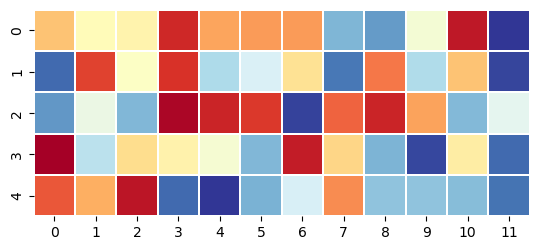

In [6]:
sns.heatmap(A, cmap = 'RdYlBu_r', square = True, 
            cbar = False,
            linecolor = 'w', linewidths = 0.25)

In [7]:
B =  np.random.uniform(-1, 1, (12, 8))
# 生成一个 5×12 的随机整数矩阵（数值范围 0~10）
B

array([[-0.63544881,  0.78586467, -0.8805252 , -0.66807296, -0.92597501,
         0.40170689,  0.99329933, -0.77794562],
       [ 0.44911418, -0.32517321, -0.6463447 ,  0.88373575,  0.95186898,
         0.52953172, -0.19490997, -0.16397646],
       [ 0.28995495, -0.92863205, -0.73063709,  0.26954949,  0.86110223,
         0.90084512,  0.12667943, -0.57593776],
       [ 0.0818441 , -0.65333352, -0.70500183,  0.45299007, -0.58046341,
        -0.95581985,  0.25193687,  0.90186504],
       [ 0.78719916, -0.26147268,  0.85737295,  0.02976143,  0.88742041,
         0.13894219, -0.97340213, -0.32344632],
       [-0.76270929, -0.31874168, -0.27196198,  0.30947122,  0.87200487,
        -0.60105042,  0.24760211, -0.68565583],
       [-0.8348775 ,  0.38619428, -0.45257766, -0.19015451,  0.99434971,
         0.0082224 ,  0.87605771, -0.28638224],
       [-0.40400711, -0.7689096 , -0.09600042,  0.95586342, -0.06598517,
        -0.93511531,  0.31161634, -0.94289277],
       [-0.39658628,  0.95619366

<Axes: >

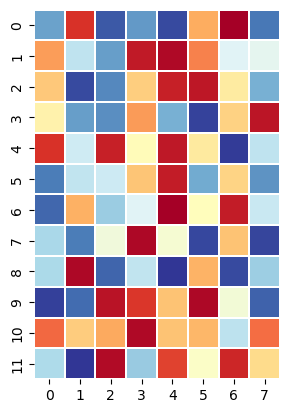

In [8]:
sns.heatmap(B, cmap = 'RdYlBu_r', square = True, 
            cbar = False,
            linecolor = 'w', linewidths = 0.25)

## 矩阵乘法 A@B

In [10]:
C = A @ B
C

array([[ 0.98797093,  0.66910163, -0.88876459,  1.12118591,  0.69130305,
        -0.25055795, -0.06932378,  1.08696502],
       [ 1.61749156,  1.31993114, -2.06638394,  0.89880038, -0.60852435,
         0.072751  , -1.89227367,  2.23129511],
       [-0.07813197, -1.37788175,  0.57851779,  1.23120289, -1.1172428 ,
        -2.11212281, -2.4691439 , -0.4314863 ],
       [ 0.34710126,  2.04869843, -2.23427683, -1.05088561, -1.11971085,
        -0.61067229,  1.68173533,  0.13102407],
       [ 0.2644065 ,  0.65919255, -2.46419918, -0.30393328, -1.04122842,
         0.96055876,  1.22317478, -1.31792664]])

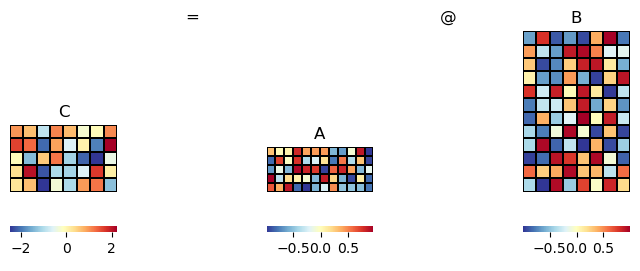

In [32]:
fig, axs = plt.subplots(1, 5, figsize=(8, 3))  

plt.sca(axs[0])
ax = sns.heatmap(C, cmap='RdYlBu_r', 
                 linecolor = 'k', linewidths = '0.25',
                 xticklabels = [], yticklabels = [],
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('C')

plt.sca(axs[1])
plt.title('=')  # 绘制等号
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(A, cmap='RdYlBu_r', 
                 linecolor = 'k', linewidths = '0.25',
                 xticklabels = [], yticklabels = [],
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('A')

plt.sca(axs[3])
plt.title('@')  # 绘制乘号
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(B, cmap='RdYlBu_r', 
                 linecolor = 'k', linewidths = '0.25',
                 xticklabels = [], yticklabels = [],
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('B')

## 叠加

In [11]:
A_shape = A.shape
A_shape

(5, 12)

In [12]:
p = A_shape[1]
p

12

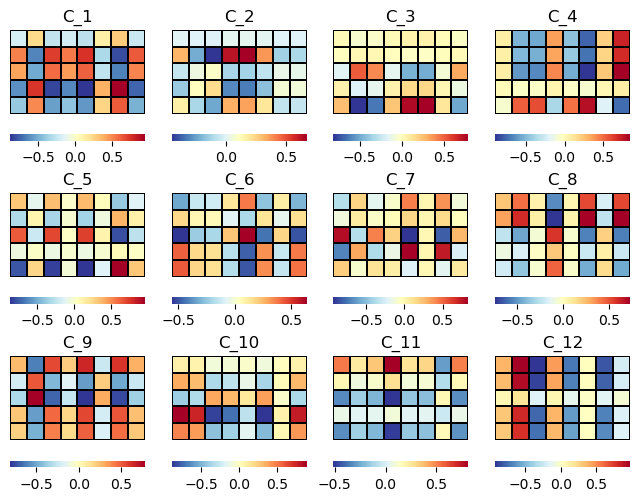

In [40]:
fig, axs = plt.subplots(3, 4, figsize=(8, 6))  
axs = axs.flatten()

for k in range(p):
    C_k = A[:,[k]] @ B [[k],:]

    plt.sca(axs[k])
    ax = sns.heatmap(C_k, cmap='RdYlBu_r', 
                     linecolor = 'k', linewidths = '0.25',
                     xticklabels = [], yticklabels = [],
                     cbar_kws={"orientation": "horizontal"})
    ax.set_aspect("equal")
    plt.title('C_' + str(k+1))


作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  